# HilosPython2.0

## Hilos (Threads) en Python

Permiten aprovechar las capacidades multiprocesador para ejecutar varias instrucciones a la vez, como subprocesos independientes.

Chapter 2: Thread-based Parallelism

https://github.com/jsdnhk/python-parallel-programming-cookbook-code/tree/master/Chapter%202

## ¿Cómo utilizar los hilos?

La forma más sencilla de usar un subproceso es instanciarlo con una función de destino y luego llamar al método start() para que comience a funcionar.

El subprocesamiento del módulo de Python tiene el método Thread():

**class threading.Thread(group=None,
                        target=None,
                        name=None,
                        args=(),
                        kwargs={})**

- *group*: Este es el valor del grupo que debe ser Ninguno; esto está reservado para futuras implementaciones
- *target*: esta es la función que se ejecutará cuando inicie una actividad de subproceso
- *name*: Este es el nombre del hilo; por defecto, se le asigna un nombre único de la forma Thread-N
- *args*: esta es la tupla de argumentos que se pasarán a un destino
- *kwargs*: este es el diccionario de argumentos de palabras clave que se utilizarán para la función de destino

In [ ]:
import threading        # Manejo de hilos
from time import sleep  # Pausar tiempo
import random           # Números aleatorios

def function(i):
    sleep(1.5*random.random()) #Tiempo de 0<t<1.5
    return print ("Función llamada por el hilo %i" %i)

for i in range(5):
    t = threading.Thread(target=function, args=(i,)) # Instanciarlo con una función de destino
    t.start() # Comience a funcionar
    #t.join()  # Esperar por otro hilo

Función llamada por el hilo 4
Función llamada por el hilo 3
Función llamada por el hilo 1
Función llamada por el hilo 2
Función llamada por el hilo 0


## ¿Cómo determinar el hilo actual?

- Cada instancia de Thread asigna un nombre de forma predetermianda.
- El uso de argumentos para identificar o nombrar el subproceso es innecesario.
- Nombrar subprocesos es útil en procesos de servidor con múltiples subprocesos de servicio que manejan diferentes operaciones

In [ ]:
import threading # Manejo de hilos
import time      # librería para tiempo

def first_function():
    print (threading.currentThread().getName()+str(' iniciando...\n'))
    time.sleep(1)
    print (threading.currentThread().getName()+str(' finalizó\n'))
    return

def second_function():
    print (threading.currentThread().getName()+str(' iniciando...\n'))
    time.sleep(5)
    print (threading.currentThread().getName()+str(' finalizó \n'))
    return


t1 = threading.Thread(name='Thread-Nombre', target=first_function) # Nombre de hilo asignado
t2 = threading.Thread(                      target=second_function) # Toma nombre de hilo por defecto automáticamente
t1.start()
t2.start()


Thread-Nombre iniciando...

Thread-23 iniciando...



Thread-Nombre finalizó

Thread-23 finalizó 



## ¿Cómo crear un hilo con temporizador de inicio?

In [ ]:
# Crear y ejecutar hilos con temporizador
import threading

def ejecutar(tiempo_s):
    print(f'El hilo {threading.current_thread().name} te saluda luego de tu espera de {tiempo_s} segundos')

# creamos un temporizador
tiempo_s = 5
temporizador = threading.Timer(tiempo_s, function=ejecutar, args=(tiempo_s,))  # Crear el hilo con temporizador
temporizador.start()                                   # El hilo empezará cuando pasen segundos dados
print("No te vayas, espera...")

No te vayas, espera...


El hilo Thread-25 te saluda luego de tu espera de 5 segundos


## ¿Cómo crear hilos, ejecutarlos y que el principal espere?

In [ ]:
import threading        # Manejo de hilos
from time import sleep  # Pausar tiempos
import random           # Números aleatorios

def ejecutar():
    print(f'Comienza {threading.current_thread().name}')
    sleep(1.5*random.random()) #Tiempo de 0<t<1.5
    print(f'Termina {threading.current_thread().name}')

# Crear los hilos
hilo1 = threading.Thread(target=ejecutar, name='Hilo 1')
hilo2 = threading.Thread(target=ejecutar, name='Hilo 2')
hilo3 = threading.Thread(target=ejecutar, name='Hilo 3')

hilo4 = threading.Thread(target=ejecutar, name='Hilo 4')
hilo5 = threading.Thread(target=ejecutar, name='Hilo 5')
hilo6 = threading.Thread(target=ejecutar, name='Hilo 6')

# Ejecutar los hilos
hilo1.start()
hilo2.start()
hilo3.start()

# Esperar a que terminen los hilos ejecutados
hilo1.join()
hilo2.join()
hilo3.join()


# Ejecutar los hilos secuencialmente
hilo4.start()
hilo4.join()
hilo5.start()
hilo5.join()
hilo6.start()
hilo6.join()

print('El hilo principal sí espera por el resto de hilos.')

Comienza Hilo 1
Comienza Hilo 2
Comienza Hilo 3
Termina Hilo 1
Termina Hilo 2
Termina Hilo 3
Comienza Hilo 4
Termina Hilo 4
Comienza Hilo 5
Termina Hilo 5
Comienza Hilo 6
Termina Hilo 6
El hilo principal sí espera por el resto de hilos.


## ¿Cómo crear hilos, ejecutarlos y que el principal no espere?

In [ ]:
import threading        # Manejo de hilos
from time import sleep  # Pausar tiempos
import random           # Números aleatorios

def ejecutar():
    print(f'Comienza {threading.current_thread().name}')
    sleep(1.5*random.random()) #Tiempo de 0<t<1.5
    print(f'Termina {threading.current_thread().name}')

# Crear los hilos
hilo1 = threading.Thread(target=ejecutar, name='Hilo 1')
hilo2 = threading.Thread(target=ejecutar, name='Hilo 2')
hilo3 = threading.Thread(target=ejecutar, name='Hilo 3')

# Ejecutar los hilos
hilo1.start()
hilo2.start()
hilo3.start()

# Esperar a que terminen los hilos ejecutados
#hilo1.join()
#hilo2.join()
#hilo3.join()

print('\nEl hilo principal no espera por el resto de hilos.\n')

Comienza Hilo 1
Comienza Hilo 2
Comienza Hilo 3

El hilo principal no espera por el resto de hilos.



Termina Hilo 3
Termina Hilo 2
Termina Hilo 1


## ¿Cómo implemento un hilo en una subclase?

- Definir una nueva subclase de la clase Thread


- Llamar al constructor de la clase Thread es obligatorio; usándolo, podemos redefinir algunas propiedades del hilo como el nombre del hilo.


- Sobrecargue el método _init__(self [,args]) para agregar argumentos adicionales


- Luego, debo sobrecargar el método run(self [,args]) para implementar lo que debe hacer el subproceso cuando se inicia


- En el programa principal, creamos varios objetos del tipo myThread; la ejecución del hilo comienza cuando se llama al método start().


- El subproceso se coloca en el estado activo de la llamada a start() y permanece allí hasta que finaliza el método run() o lanza una excepción no controlada.


- El programa finaliza cuando todos los subprocesos finalizan.

### Caso 1

In [ ]:
import threading
import time

class myThread (threading.Thread):
    def __init__(self, threadID, name, counter):
        threading.Thread.__init__(self)
        self.threadID = threadID
        self.name = name
        self.counter = counter
    def run(self):
        print ("Iniciando " + self.name)
        print_time(self.name, 5,self.counter)
        print ("Finalizando " + self.name)

def print_time(threadName, delay, counter):
    while counter:
        time.sleep(delay)
        print ("%s: %s\n" %(threadName, time.strftime("%H:%M:%S", time.localtime(time.time())))) # Thread-#: HH:MM:SS
        counter -= 1

# Crear hilos
thread1 = myThread(1, "Thread-1", 1) # Objetos del tipo myThread # Hilo que muestra la hora cada 1 segundo
thread2 = myThread(2, "Thread-2", 3) # Objetos del tipo myThread # Hilo que muestra la hora cada 4 segundos

# Iniciar los hilos
thread1.start() #la ejecución del hilo comienza cuando se llama al método start().
thread2.start() #la ejecución del hilo comienza cuando se llama al método start().


Iniciando Thread-1
Iniciando Thread-2


Thread-2: 15:14:41

Thread-1: 15:14:41

Finalizando Thread-1
Thread-2: 15:14:46

Thread-2: 15:14:51

Finalizando Thread-2


### Caso 2

In [ ]:
import threading
import time

class myThread (threading.Thread):
    def __init__(self, threadID, name, delay):
        threading.Thread.__init__(self)
        self.threadID = threadID
        self.name = name
        self.delay = delay
    def run(self):
        print ("Iniciando " + self.name)
        print_time(self.name, self.delay,5)
        print ("Finalizando " + self.name)

def print_time(threadName, delay, counter):
    while counter:
        time.sleep(delay)
        print ("%s: %s\n" %(threadName, time.strftime("%H:%M:%S", time.localtime(time.time())))) # Thread-#: HH:MM:SS
        counter -= 1

# Crear hilos
thread1 = myThread(1, "Thread-1", 1) # Objetos del tipo myThread # Hilo que muestra la hora cada 1 segundo
thread2 = myThread(2, "Thread-2", 3) # Objetos del tipo myThread # Hilo que muestra la hora cada 4 segundos

# Iniciar los hilos
thread1.start() #la ejecución del hilo comienza cuando se llama al método start().
thread2.start() #la ejecución del hilo comienza cuando se llama al método start().


Iniciando Thread-1
Iniciando Thread-2


Thread-1: 15:16:34

Thread-1: 15:16:35

Thread-2: 15:16:36

Thread-1: 15:16:36

Thread-1: 15:16:37

Thread-1: 15:16:38

Finalizando Thread-1
Thread-2: 15:16:39

Thread-2: 15:16:42

Thread-2: 15:16:45

Thread-2: 15:16:48

Finalizando Thread-2


## ¿Hay que tomar precauciones al utilizar los hilos?

- Mientras el programa principal ha llegado al final, el hilo continúa imprimiendo su mensaje cada dos segundos.
- Este ejemplo demuestra qué son los subprocesos: una subtarea que hace algo en un proceso principal.

Un punto clave a tener en cuenta al usar subprocesos es que siempre debe asegurarse de **nunca dejar ningún subproceso ejecutándose en segundo plano.** Esta es una programación muy mala y puede causarle todo tipo de problemas cuando trabaja en aplicaciones más grandes.

In [ ]:
from threading import Thread
from time import sleep

class CookBook(Thread):
    def __init__(self):
        Thread.__init__(self)
        self.message = "Hilo Trabajando!\n"

    def print_message(self):
        print (self.message)

    def run(self):
        print ("Hilo Inicia\n")
        x=0
        while (x < 3):
            self.print_message()
            sleep(2)
            x += 1
        print ("Hilo Finaliza\n")

print('\nPrograma principal inicia.\n')
hello_Python = CookBook()
hello_Python.start()
print('\nPrograma principal finaliza.\n')


Programa principal inicia.

Hilo Inicia

Hilo Trabajando!


Programa principal finaliza.



Hilo Trabajando!

Hilo Trabajando!

Hilo Finaliza



## ¿Cómo hago para detener a los hilos?

### Iniciar mis hilos

In [ ]:
import threading
import time
import numpy as np

# Variable global para indicar a los hilos que deben detenerse
global exit_flag
exit_flag = True

# Función que ejecutará cada hilo
def thread_function(thread_num):
    while exit_flag:

        # Es aquí donde puedes poner el código que hace el trabajo del hilo
        print(f"Hola, soy el hilo {thread_num}")
        time.sleep(2*np.random.rand())

        pass
    print(f"Hilo {thread_num} detenido")

# Crear los hilos
threads = []
for i in range(2):
    t = threading.Thread(target=thread_function, args=(i,))
    threads.append(t)

# Iniciar los hilos
for t in threads:
    t.start()


Hola, soy el hilo 0
Hola, soy el hilo 1
Hola, soy el hilo 0


Hola, soy el hilo 1
Hola, soy el hilo 0
Hola, soy el hilo 1
Hola, soy el hilo 1
Hola, soy el hilo 1
Hola, soy el hilo 0
Hola, soy el hilo 0
Hola, soy el hilo 1
Hola, soy el hilo 1
Hola, soy el hilo 0
Hola, soy el hilo 0
Hola, soy el hilo 1
Hola, soy el hilo 0
Hola, soy el hilo 1
Hola, soy el hilo 0


### Detener mis hilos

In [ ]:
# Detener todos los hilos
exit_flag = False


Hola, soy el hilo 0


Hilo 1 detenido
Hilo 0 detenido


## ¿Sumar matrices por filas? Veamoslo

Realizaré la suma de las filas de tres matrices, cada una con cuatro filas y diez columnas. Tengo a mi disposición cuatro hilos de procesamiento y utilizaré un hilo para procesar cada conjunto de filas de las tres matrices. El proceso de suma de filas tarda aproximadamente 2 segundos en ejecutarse.

### ¿Hilo por hilo? 😒

In [ ]:
# Librerias que utilizaremos
import threading   # Manejo de hilos
import numpy as np # Manejo de matrices
import time        # Manejo de tiempos

# Definir las 3 matrices de 4x10, con números enteros entre 0 y 10
matrix1 = np.round(10*np.random.rand(4, 10)).astype(np.int8)
matrix2 = np.round(10*np.random.rand(4, 10)).astype(np.int8)
matrix3 = np.round(10*np.random.rand(4, 10)).astype(np.int8)

# Definir una matriz resultado de 4x10 con todos los valores en cero
result_matrix = np.zeros((4, 10)).astype(np.int8)

# Definir una función para sumar las filas de las matrices
def sum_rows(row_idx):
    global result_matrix
    result_matrix[row_idx] = matrix1[row_idx] + matrix2[row_idx] + matrix3[row_idx]
    time.sleep(2) # Se demora 2 segundos sumando una fila

# Iniciar medición del tiempo
inicio = time.time()

# Crear 4 hilos, uno para cada fila
hilo1 = threading.Thread(target=sum_rows, args=(0,)) # Suma fila 1
hilo2 = threading.Thread(target=sum_rows, args=(1,)) # Suma fila 2
hilo3 = threading.Thread(target=sum_rows, args=(2,)) # Suma fila 3
hilo4 = threading.Thread(target=sum_rows, args=(3,)) # Suma fila 4

hilo1.start() # Poner a trabajar hilo 1
hilo1.join()  # Esperar a que el hilo 1 termine

hilo2.start() # Poner a trabajar hilo 2
hilo2.join()  # Esperar a que el hilo 2 termine

hilo3.start() # Poner a trabajar hilo 3
hilo3.join()  # Esperar a que el hilo 3 termine

hilo4.start() # Poner a trabajar hilo 4
hilo4.join()  # Esperar a que el hilo 4 termine

# Imprimir las matrices y la matriz resultado
print("Matrix1:\n", matrix1)
print("Matrix2:\n", matrix2)
print("Matrix3:\n", matrix3)
print("Result Matrix:\n", result_matrix)

# Mostrar tiempo requerido
fin = time.time()
tiempo_total = fin - inicio
print(tiempo_total,"segundos")

Matrix1:
 [[5 2 5 3 2 8 9 1 9 5]
 [2 7 8 5 5 2 3 4 4 5]
 [5 6 4 1 8 9 6 9 1 1]
 [2 8 7 1 8 6 5 1 0 3]]
Matrix2:
 [[ 1  1  9  7  4  2  0  7  1  1]
 [10  1  3  8  3  3  8  4  1  3]
 [10  1  8  0  9  7  2  1  8  9]
 [ 9 10  7  6 10  3  1  3  9  1]]
Matrix3:
 [[10 10  8 10  9  5 10  1  5 10]
 [ 0  2  0  4  1  2  2  9  0  5]
 [ 2  4  5  5  3  1  8  1  0  5]
 [ 8  1 10  5  8  1  6  4  6  9]]
Result Matrix:
 [[16 13 22 20 15 15 19  9 15 16]
 [12 10 11 17  9  7 13 17  5 13]
 [17 11 17  6 20 17 16 11  9 15]
 [19 19 24 12 26 10 12  8 15 13]]
8.03369927406311 segundos


### ¿Todos los hilos al tiempo? 😃

In [ ]:
# Librerias que utilizaremos
import threading   # Manejo de hilos
import numpy as np # Manejo de matrices
import time        # Manejo de tiempos

# Definir las 3 matrices de 4x10, con números enteros entre 0 y 10
matrix1 = np.round(10*np.random.rand(4, 10)).astype(np.int8)
matrix2 = np.round(10*np.random.rand(4, 10)).astype(np.int8)
matrix3 = np.round(10*np.random.rand(4, 10)).astype(np.int8)

# Definir una matriz resultado de 4x10 con todos los valores en cero
result_matrix = np.zeros((4, 10)).astype(np.int8)

# Definir una función para sumar las filas de las matrices
def sum_rows(row_idx):
    global result_matrix
    result_matrix[row_idx] = matrix1[row_idx] + matrix2[row_idx] + matrix3[row_idx]
    time.sleep(2) # Se demora 2 segundos sumando una fila

# Iniciar medición del tiempo
inicio = time.time()

# Crear 4 hilos, uno para cada fila
hilo1 = threading.Thread(target=sum_rows, args=(0,)) # Suma fila 1
hilo2 = threading.Thread(target=sum_rows, args=(1,)) # Suma fila 2
hilo3 = threading.Thread(target=sum_rows, args=(2,)) # Suma fila 3
hilo4 = threading.Thread(target=sum_rows, args=(3,)) # Suma fila 4

# Poner a trabajar a los hilos
hilo1.start()
hilo2.start()
hilo3.start()
hilo4.start()

# Esperar a que todos los hilos terminen
hilo1.join()
hilo2.join()
hilo3.join()
hilo4.join()

# Imprimir las matrices y la matriz resultado
print("Matrix1:\n", matrix1)
print("Matrix2:\n", matrix2)
print("Matrix3:\n", matrix3)
print("Result Matrix:\n", result_matrix)

# Mostrar tiempo requerido
fin = time.time()
tiempo_total = fin - inicio
print(tiempo_total,"segundos")

Matrix1:
 [[ 7  5  1  0  1  1  0  9  2  8]
 [ 8  4  9  3  7 10  4  5  4  5]
 [ 6  7  2  7  7  7  1  4  2  1]
 [ 7  2  5  3  5  5  6  3  7  7]]
Matrix2:
 [[ 7  3  7 10  1 10  2  4  4 10]
 [ 8  7  9  4  9  2  1  4  6  4]
 [ 9  6  1  9  5 10  7  9  3  3]
 [ 5  5  6  0  7  5  7  1  5  8]]
Matrix3:
 [[ 2  9  2  4  7  0  1  8  5  7]
 [ 2 10  1  5  5  2 10  0  5  7]
 [ 5  3  9  2  3  6  0  7  5  6]
 [ 1  8  6  5  3  9  4  3  4  2]]
Result Matrix:
 [[16 17 10 14  9 11  3 21 11 25]
 [18 21 19 12 21 14 15  9 15 16]
 [20 16 12 18 15 23  8 20 10 10]
 [13 15 17  8 15 19 17  7 16 17]]
2.016512393951416 segundos


### ¿Y si sólo tengo 2 hilos? 😵‍💫

In [ ]:
# Librerias que utilizaremos
import threading   # Manejo de hilos
import numpy as np # Manejo de matrices
import time        # Manejo de tiempos

# Definir las 3 matrices de 4x10, con números enteros entre 0 y 10
matrix1 = np.round(10*np.random.rand(4, 10)).astype(np.int8)
matrix2 = np.round(10*np.random.rand(4, 10)).astype(np.int8)
matrix3 = np.round(10*np.random.rand(4, 10)).astype(np.int8)

# Definir una matriz resultado de 4x10 con todos los valores en cero
result_matrix = np.zeros((4, 10)).astype(np.int8)

# Definir una función para sumar las filas de las matrices
def sum_rows(row_idx):
    global result_matrix
    result_matrix[row_idx] = matrix1[row_idx] + matrix2[row_idx] + matrix3[row_idx]
    time.sleep(2) # Se demora 2 segundos sumando una fila

# Iniciar medición del tiempo
inicio = time.time()

# Crear 2 hilos, uno para cada fila
hilo1 = threading.Thread(target=sum_rows, args=(0,)) # Suma fila 1
hilo2 = threading.Thread(target=sum_rows, args=(1,)) # Suma fila 2
# Poner a trabajar a los hilos
hilo1.start()
hilo2.start()
# Esperar a que todos los hilos terminen
hilo1.join()
hilo2.join()

# Crear 2 hilos, uno para cada fila
hilo1 = threading.Thread(target=sum_rows, args=(2,)) # Suma fila 2
hilo2 = threading.Thread(target=sum_rows, args=(3,)) # Suma fila 3
# Poner a trabajar a los hilos
hilo1.start()
hilo2.start()
# Esperar a que todos los hilos terminen
hilo1.join()
hilo2.join()

# Imprimir las matrices y la matriz resultado
print("Matrix1:\n", matrix1)
print("Matrix2:\n", matrix2)
print("Matrix3:\n", matrix3)
print("Result Matrix:\n", result_matrix)

# Mostrar tiempo requerido
fin = time.time()
tiempo_total = fin - inicio
print(tiempo_total,"segundos")

Matrix1:
 [[ 6  1 10 10  3  4  3 10  5  5]
 [ 3  0  4  4  2  9  3  1  9  2]
 [10  2  3 10  7  6  8  9  8  2]
 [ 7  5  6  1  8  3  2  5  5  6]]
Matrix2:
 [[0 9 2 7 5 7 7 8 8 2]
 [7 2 3 8 4 8 3 9 0 5]
 [9 0 2 9 6 4 5 5 3 6]
 [6 4 2 8 8 8 4 2 5 1]]
Matrix3:
 [[ 0  6  1  2  0  4  1  9  6  3]
 [ 2  5  6  9  0  6 10  5  3  2]
 [ 8  7 10  0  4  6  5  1  8  6]
 [ 2  3  1 10  9  8  6  1  0  4]]
Result Matrix:
 [[ 6 16 13 19  8 15 11 27 19 10]
 [12  7 13 21  6 23 16 15 12  9]
 [27  9 15 19 17 16 18 15 19 14]
 [15 12  9 19 25 19 12  8 10 11]]
4.013372421264648 segundos


### ¿Y si sólo tengo 2 hilos? 😵‍💫 Otra forma de Distribuir

In [ ]:
# Librerias que utilizaremos
import threading   # Manejo de hilos
import numpy as np # Manejo de matrices
import time        # Manejo de tiempos

# Definir las 3 matrices de 4x10, con números enteros entre 0 y 10
matrix1 = np.round(10*np.random.rand(4, 10)).astype(np.int8)
matrix2 = np.round(10*np.random.rand(4, 10)).astype(np.int8)
matrix3 = np.round(10*np.random.rand(4, 10)).astype(np.int8)

# Definir una matriz resultado de 4x10 con todos los valores en cero
result_matrix = np.zeros((4, 10)).astype(np.int8)

# Definir una función para sumar las filas de las matrices
def sum_rows(row_idx):
    global result_matrix
    result_matrix[row_idx] = matrix1[row_idx] + matrix2[row_idx] + matrix3[row_idx]
    result_matrix[row_idx+1] = matrix1[row_idx+1] + matrix2[row_idx+1] + matrix3[row_idx+1]
    time.sleep(2) # Se demora 2 segundos sumando una fila

# Iniciar medición del tiempo
inicio = time.time()

# Crear 2 hilos, uno para cada fila
hilo1 = threading.Thread(target=sum_rows, args=(0,)) # Suma fila 1
hilo2 = threading.Thread(target=sum_rows, args=(2,)) # Suma fila 2
# Poner a trabajar a los hilos
hilo1.start()
hilo2.start()
# Esperar a que todos los hilos terminen
hilo1.join()
hilo2.join()

# Imprimir las matrices y la matriz resultado
print("Matrix1:\n", matrix1)
print("Matrix2:\n", matrix2)
print("Matrix3:\n", matrix3)
print("Result Matrix:\n", result_matrix)

# Mostrar tiempo requerido
fin = time.time()
tiempo_total = fin - inicio
print(tiempo_total,"segundos")

Matrix1:
 [[5 2 9 1 2 7 3 8 0 3]
 [3 5 6 5 1 5 4 4 3 5]
 [2 1 1 9 1 2 6 8 4 6]
 [4 4 5 2 4 9 5 1 7 2]]
Matrix2:
 [[ 7  9  1  3  0  6  2  2  0  1]
 [ 1  7 10 10  2  3  1  8  1  3]
 [ 6  8  7 10  9  1  3  1  2  3]
 [ 8  3  6  7  8  8  2  8  0  3]]
Matrix3:
 [[ 1  8  3  5  3  8  4  6  6  1]
 [ 1  7  2  7  8  7  2  7  6  7]
 [ 5  0  4  1  1  3  1 10  0  7]
 [10 10  5  1  3  8  4  4  8  5]]
Result Matrix:
 [[13 19 13  9  5 21  9 16  6  5]
 [ 5 19 18 22 11 15  7 19 10 15]
 [13  9 12 20 11  6 10 19  6 16]
 [22 17 16 10 15 25 11 13 15 10]]
2.0148682594299316 segundos


# Clase 2 Otros conceptos de los hilos

### ¿Qué hay de la aceleración?

Relacionemos los tiempos del algoritmo ejecutado con diferente cantidad de hilos.

- Hilo por hilo le toma al algoritmo 8 segundos aprox.
- Con 2 hilos le toma al algoritmo 4 segundos aprox.
- Con 4 hilos le toma al algoritmo 2 segundos aprox.

¿cuánto es la aceleración del algoritmo si con 2 hilos la realiza en 4 segundos aprox.?

In [ ]:
t_1 = 8 # Tiempo con 1 hilo
t_2 = 4 # Tiempo con 2 hilos

Aceleracion = t_1/t_2
print(f" La aceleración es de {Aceleracion} veces")

 La aceleración es de 2.0 veces


¿cuánto es la aceleración del algoritmo si con 4 hilos la realiza en 2 segundos aprox.?

In [ ]:
t_1 = 8 # Tiempo con 1 hilo
t_2 = 2 # Tiempo con 4 hilos

Aceleracion = t_1/t_2
print(f" La aceleración es de {Aceleracion} veces")

 La aceleración es de 4.0 veces


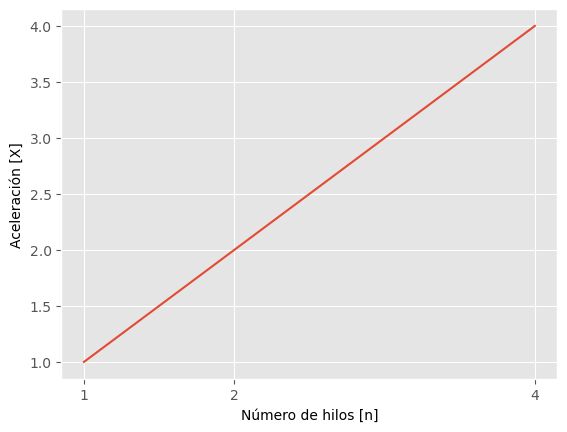

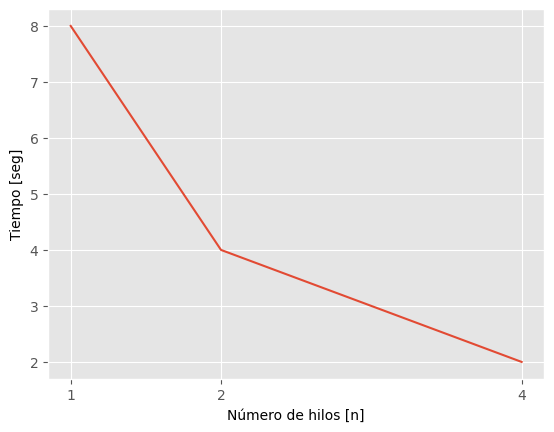

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

t_1 = 8 # Tiempo que emplea el algoritmo ejecutandose en un solo hilo
n_hilos = np.array([1,2,4])
t_paralelo = np.array([8,4,2])

# Miremos gráficamente el comportamiento.
acel = t_1 / t_paralelo
plt.plot(n_hilos, acel)
plt.xticks(n_hilos);
plt.ylabel("Aceleración [X]");
plt.xlabel("Número de hilos [n]");

plt.figure()
plt.plot(n_hilos, t_paralelo)
plt.xticks(n_hilos);
plt.ylabel("Tiempo [seg]");
plt.xlabel("Número de hilos [n]");


## Y si deseo depurar mi código ¿Cómo lo hago?

Si vamos a depurar algo relacionado con los threads es recomendable utilizar el módulo logging.

In [ ]:
import threading
import logging
import time

# Configuramos el nivel de registro para DEBUG
logging.basicConfig(level=logging.DEBUG, format='[%(levelname)s] - %(threadName)-10s : %(message)s')

def worker(indice):
    # Registramos un mensaje de depuración al inicio de la función
    logging.debug('Inicio depuración')

    # Hacemos una pausa de 2 segundos
    time.sleep(2)

    # Generamos un caso correcto y una excepción IndexError
    my_list = [1, 2, 4]
    try:
        print(my_list[indice])
        # Registramos un mensaje de información
        logging.info('Código funciona correctamente')
    except IndexError:
        # Si se produce una excepción IndexError, se registrará un mensaje de registro de nivel ERROR
        logging.error('Índice fuera de rango')#, exc_info=True) # True muestra detalles

    # Registramos un mensaje de depuración al final de la función
    logging.debug('Fin depuración')


In [ ]:
# Creamos un hilo y lo iniciamos -> Funciona bien - Indice dentro del rango
w1 = threading.Thread(target=worker, name='Hilo 1', args=(2,))
w1.start()
w1.join()

[DEBUG] - Hilo 1     : Inicio depuración
[INFO] - Hilo 1     : Código funciona correctamente
[DEBUG] - Hilo 1     : Fin depuración


4


In [ ]:
# Creamos un hilo y lo iniciamos -> Error - Indice fuera del rango
w2 = threading.Thread(target=worker, name='Hilo 2', args=(3,))
w2.start()
w2.join()

[DEBUG] - Hilo 2     : Inicio depuración
[ERROR] - Hilo 2     : Índice fuera de rango
[DEBUG] - Hilo 2     : Fin depuración


## ¿Qué son y cómo se usan los demonios en Python?

- En Python, podemos lanzar un hilo como daemon utilizando "daemon=True" de la clase Thread. Por defecto está en False.


- Un hilo daemon se ejecuta en segundo plano, y se detiene automáticamente cuando el programa principal termina su ejecución.

   
- En general, los daemons se utilizan para realizar tareas de servicio, como administrar recursos compartidos, realizar copias de seguridad, mantener registros de actividad, etc.


Es necesario ejecutar directamente como archivo PY dado que por el Kernel de Jupyter Notebook no se puede ver la funcionalidad de los demonios ejecutandose en las celdas como se ha venido realizando.

In [ ]:
# Definimos la ruta y el nombre del archivo que queremos ejecutar
archivo = './daemon.py'

# Escribir el código Python en un archivo llamado daemon.py
with open(archivo, 'w') as file:
    file.write("""

import threading
import time
import sys

def tarea():
    for i in range(7):
        print("Hilo ejecutandose")
        time.sleep(0.5)

hilo = threading.Thread(target=tarea, daemon=False) #False)
hilo.start()
time.sleep(2)
print("Final del programa")

""")
file.close()

import subprocess

# Ejecutamos el archivo utilizando subprocess
resultado = subprocess.run(['python', archivo], stdout=subprocess.PIPE, stderr=subprocess.PIPE)

# Imprimimos la salida del archivo
print(resultado.stdout.decode())


Hilo ejecutandose
Hilo ejecutandose
Hilo ejecutandose
Hilo ejecutandose
Final del programa
Hilo ejecutandose
Hilo ejecutandose
Hilo ejecutandose



## ¿Cómo sincronizamos hilos en Python?

- Los hilos tienen la capacidad de compartirse información y resultados, para esto se necesitan sincronizar.


- Sincronizar hilos consiste en que unos esperen por otros cuando es necesario,

### Join
- La manera más habitual de sincronización es hacer que el programa o hilo principal espere a que el resto de hilos termine para proseguir su ejecución. Esto se logra con la llamada al método join de los objetos Thread.


- Cuando se llama a join, el hilo que hace la llamada se queda en espera, es decir, se bloquea, hasta que el hilo en cuestión, sobre el que se ha invocado el método, termina.

In [ ]:
import threading
from time import sleep
import random

var = str()

def ejecutar1():
    global var
    print(f'Inicio {threading.current_thread().name}')
    sleep(random.random())  # esperamos un tiempo aleatorio entre 0 y 1 segundos
    print(f'Final {threading.current_thread().name} \n')
    var = var+"Hola "

def ejecutar2():
    global var
    print(f'Inicio {threading.current_thread().name}')
    sleep(random.random())  # esperamos un tiempo aleatorio entre 0 y 1 segundos
    print(f'Final {threading.current_thread().name} \n')
    var = var+"Mundo"

# creamos los hilos
hilo1 = threading.Thread(target=ejecutar1, name='Hilo 1')
hilo2 = threading.Thread(target=ejecutar2, name='Hilo 2')

# ejecutamos los hilos
hilo1.start()
# esperamos a que terminen los hilos
hilo1.join()

hilo2.start()
hilo2.join()

print('Final del hilo principal.\n')
print(var)

Inicio Hilo 1
Final Hilo 1 

Inicio Hilo 2
Final Hilo 2 

Final del hilo principal.

Hola Mundo


#### Caso 2

In [ ]:
import threading
from time import sleep
import random

var = str()

def ejecutar1():
    global var
    print(f'Inicio {threading.current_thread().name}')
    sleep(random.random())  # esperamos un tiempo aleatorio entre 0 y 1 segundos
    print(f'Final {threading.current_thread().name} \n')
    var = var+"Hola "

def ejecutar2():
    global var
    print(f'Inicio {threading.current_thread().name}')
    sleep(random.random())  # esperamos un tiempo aleatorio entre 0 y 1 segundos
    print(f'Final {threading.current_thread().name} \n')
    var = var+"Mundo"

# creamos los hilos
hilo1 = threading.Thread(target=ejecutar1, name='Hilo 1')
hilo2 = threading.Thread(target=ejecutar2, name='Hilo 2')

# ejecutamos los hilos
hilo1.start()
# esperamos a que terminen los hilos
#hilo1.join()

hilo2.start()
#hilo2.join()

print('Final del hilo principal.\n')
print(var)

Inicio Hilo 1
Inicio Hilo 2
Final del hilo principal.




Final Hilo 2 

Final Hilo 1 



In [ ]:
print(var)

MundoHola 


### Bloqueos - Lock

- Un Lock es un objeto que se utiliza para bloquear el acceso a una sección crítica del código, es decir, una sección que sólo puede ser ejecutada por un hilo a la vez.


- Si creamos un objeto de clase Lock los hilos podrán invocar a sus métodos acquire y release.


- El lock es como una puerta que inicialmente está abierta. Cuando un hilo llega a la puerta, debe invocar el método **acquire** para pasar por ella y cerrarla. En ese momento, el hilo tiene acceso al recurso compartido que se está regulando detrás de la puerta.


- Si otro hilo llega a la puerta y hace acquire, pero la puerta ya está cerrada por otro hilo, este segundo hilo se queda esperando en la puerta.


- Cuando el primer hilo termina de usar el recurso compartido, debe abrir la puerta invocando el método **release**. Esto abrirá la puerta y permitirá que uno de los hilos que estaba esperando pase y cierre la puerta.


- No controla quién hace release, de forma que cualquier otro hilo podría hacerlo.

In [ ]:
import threading
import random
import time

# Vaciar el archivo resultados.txt
with open("resultados.txt", "w") as f:
    f.truncate(0)

# creamos el Lock
lock_acceso_fichero = threading.Lock()

# Función donde se hace uso del .acquire() y del .release()

def escribir_valor(autor, valor):
    lock_acceso_fichero.acquire()                 # Solicitar acceso al recurso
    with open('resultados.txt', 'a') as fichero:  # Abrir archivo para añadir contenido al final
        fichero.write(f'{autor} - {valor}\n')     # Escribir
    lock_acceso_fichero.release()                 # Liberar el recurso al finalizar escritura

"""
# Función donde se hace uso del WITH de Lock
# Cuando hacemos with con un lock no tenemos que invocar a acquire ni a release, pues ya se hace automáticamente.
def escribir_valor(autor, valor):
    with lock_acceso_fichero:
        with open('resultados.txt', 'a') as fichero:  # abrimos el fichero para añadir contenido al final
            fichero.write(f'{autor} - {valor}\n')
            print("Nice")
"""

# Función llamada desde los hilos
def ejecutar():
    #time.sleep(2*random.random())
    valor = round(100*random.random())
    escribir_valor(threading.current_thread().name, valor)

# creamos los hilos
hilo1 = threading.Thread(target=ejecutar, name='Hilo 1')
hilo2 = threading.Thread(target=ejecutar, name='Hilo 2')
hilo3 = threading.Thread(target=ejecutar, name='Hilo 3')



# ejecutamos los hilos
hilo1.start()
hilo2.start()
hilo3.start()

# esperar todos los hilos ejecutados
hilo1.join()
hilo2.join()
hilo3.join()

# mostrar archivo escrito
with open('resultados.txt', 'r') as archivo:
    contenido = archivo.read()
    print(contenido)


Hilo 1 - 9
Hilo 2 - 53
Hilo 3 - 44



### Semáforos - Semaphore

- Los semáforos permiten regular el acceso a un recurso compartido por un número preestablecido de hilos.


- Cada hilo que desee acceder al recurso debe llamar al método acquire y, cuando haya terminado, debe llamar al método release.


- La clase Semaphore cumple con el protocolo de gestión de contexto, lo que significa que se puede utilizar con la construcción with para garantizar que el recurso compartido se libere correctamente, incluso en caso de errores o excepciones.


In [ ]:
import threading
import time

def imprimir_mensaje(num, semaforo):
    semaforo.acquire()
    print("Hola, soy el hilo", num)
    time.sleep(3)
    semaforo.release()

# Creamos un semáforo con capacidad para n hilos
n = 2
semaforo = threading.Semaphore(n)

# Creamos dos hilos que intentarán acceder al recurso compartido
hilo1 = threading.Thread(target=imprimir_mensaje, args=(1, semaforo))
hilo2 = threading.Thread(target=imprimir_mensaje, args=(2, semaforo))
hilo3 = threading.Thread(target=imprimir_mensaje, args=(3, semaforo))
hilo4 = threading.Thread(target=imprimir_mensaje, args=(4, semaforo))
hilo5 = threading.Thread(target=imprimir_mensaje, args=(5, semaforo))
hilo6 = threading.Thread(target=imprimir_mensaje, args=(6, semaforo))
hilo7 = threading.Thread(target=imprimir_mensaje, args=(7, semaforo))

# Iniciamos los hilos
hilo1.start()
hilo2.start()
hilo3.start()
hilo4.start()
hilo5.start()
hilo6.start()
hilo7.start()

# Esperamos a que terminen los hilos
hilo1.join()
hilo2.join()
hilo3.join()
hilo4.join()
hilo5.join()
hilo6.join()
hilo7.join()


Hola, soy el hilo 1
Hola, soy el hilo 2
Hola, soy el hilo 3
Hola, soy el hilo 4
Hola, soy el hilo 5
Hola, soy el hilo 6
Hola, soy el hilo 7


### Barreras - Barrier

- Las barreras son útiles cuando un grupo de hilos necesita esperar mutuamente unos por otros.


- Para utilizarlas, creamos una instancia de la clase Barrier con el número de hilos que deben quedar en espera en la barrera.


- Cuando un hilo llega a la barrera, llama al método wait y espera a que los demás hilos también lo hagan. Cuando todos los hilos han llamado a wait, la barrera se abre y todos los hilos continúan su ejecución.


- Las barreras son especialmente útiles cuando los hilos tienen funcionalidades diferentes y necesitan esperarse mutuamente hasta que estén preparados.


Vamos a establecer una barrera de forma que nadie pueda despedirse si no ha saludado todo el mundo (es decir, los hilos).

In [ ]:
import threading
import time
import random

def worker(num, barrier):
    sleep(random.random() * 2)
    print(f"worker {num} saluda...")
    barrier.wait()  # esperar a que todos los hilos lleguen a la barrera
    sleep(random.random() * 2)
    print(f"worker {num} se despide...")

# crear barrera para 3 hilos
barrier = threading.Barrier(3)

# crear e iniciar hilos
thread1 = threading.Thread(target=worker, args=(1, barrier))
thread2 = threading.Thread(target=worker, args=(2, barrier))
thread3 = threading.Thread(target=worker, args=(3, barrier))

thread1.start()
thread2.start()
thread3.start()


worker 2 saluda...
worker 1 saluda...
worker 3 saluda...
worker 3 se despide...
worker 1 se despide...
worker 2 se despide...


### Multiplicación de Matrices

In [ ]:

# Librerias que utilizaremos
import threading   # Manejo de hilos
import numpy as np # Manejo de matrices
import time        # Manejo de tiempos

# Definir las 3 matrices de 4x10, con números enteros entre 0 y 10
matrix1 = np.round(10*np.random.rand(2, 2)).astype(np.int8)
matrix2 = np.round(10*np.random.rand(2, 2)).astype(np.int8)

# Definir una matriz resultado de 4x10 con todos los valores en cero
result_matrix = np.zeros((2, 2)).astype(np.int8)

# Definir una función para sumar las filas de las matrices
def mul_fila(fil,col,posF,posC):
    global result_matrix
    result_matrix[posF,posC] = np.dot(fil,col)
    time.sleep(2) # Se demora 2 segundos sumando una fila

# Iniciar medición del tiempo
inicio = time.time()

# Crear 2 hilos, uno para cada fila
hilo1 = threading.Thread(target=mul_fila, args=(matrix1[0],matrix2[:,0],0,0)) # Suma fila 1
hilo2 = threading.Thread(target=mul_fila, args=(matrix1[0],matrix2[:,1],0,1)) # Suma fila 1
hilo3 = threading.Thread(target=mul_fila, args=(matrix1[1],matrix2[:,0],1,0)) # Suma fila 1
hilo4 = threading.Thread(target=mul_fila, args=(matrix1[1],matrix2[:,1],1,1)) # Suma fila 1
# Poner a trabajar a los hilos
hilo1.start()
hilo2.start()
hilo3.start()
hilo4.start()
# Esperar a que todos los hilos terminen
hilo1.join()
hilo2.join()
hilo3.join()
hilo4.join()


# Imprimir las matrices y la matriz resultado
print("Matrix1:\n", matrix1)
print("Matrix2:\n", matrix2)

print("Result Matrix:\n", result_matrix)

# Mostrar tiempo requerido
fin = time.time()
tiempo_total = fin - inicio
print(tiempo_total,"segundos")

Matrix1:
 [[7 4]
 [3 7]]
Matrix2:
 [[10  8]
 [10  8]]
Result Matrix:
 [[110  88]
 [100  80]]
2.0067086219787598 segundos
